In [61]:
import  numpy as np
import  torch
import  torch.nn as nn
import  torch.optim as optim
from    matplotlib import pyplot as plt


In [117]:
input_size = 1
hidden_size = 16
output_size = 1

2
tensor([[[ 1.8080],
         [ 1.7936],
         [ 1.7782],
         [ 1.7618],
         [ 1.7444],
         [ 1.7261],
         [ 1.7068],
         [ 1.6867],
         [ 1.6656],
         [ 1.6437],
         [ 1.6210],
         [ 1.5975],
         [ 1.5732],
         [ 1.5481],
         [ 1.5223],
         [ 1.4958],
         [ 1.4687],
         [ 1.4409],
         [ 1.4125],
         [ 1.3835],
         [ 1.3540],
         [ 1.3240],
         [ 1.2935],
         [ 1.2625],
         [ 1.2312],
         [ 1.1995],
         [ 1.1674],
         [ 1.1350],
         [ 1.1024],
         [ 1.0696],
         [ 1.0365],
         [ 1.0033],
         [ 0.9700],
         [ 0.9366],
         [ 0.9032],
         [ 0.8697],
         [ 0.8363],
         [ 0.8030],
         [ 0.7698],
         [ 0.7367],
         [ 0.7038],
         [ 0.6711],
         [ 0.6386],
         [ 0.6065],
         [ 0.5747],
         [ 0.5432],
         [ 0.5122],
         [ 0.4816],
         [ 0.4514],
         [ 0.4217]

In [65]:
class Net(nn.Module):
    def __int__(self,):
        super(Net, self).__init__()
        self.rnn = nn.RNN(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers = 1,
            batch_first = True,
        )
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden_prev):
        out, hidden_prev = self.rnn(x, hidden_prev)
        out = out.view(-1,hidden_size)
        out = self.linear(out)
        out = out.unsqueeze(dim=0)
        return out, hidden_prev

    def __init__(self, ):
        super(Net, self).__init__()

        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=1,
            batch_first=True,
        )
        for p in self.rnn.parameters():
          nn.init.normal_(p, mean=0.0, std=0.001)

        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden_prev):

       out, hidden_prev = self.rnn(x, hidden_prev)
       # [b, seq, h]
       out = out.view(-1, hidden_size)
       out = self.linear(out)
       out = out.unsqueeze(dim=0)
       return out, hidden_prev

In [66]:
lr=0.01
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr)


In [140]:
hidden_prev = torch.zeros(1,1,hidden_size)
for iter in range(2000):
    num_time_steps = 50
    start = np.random.randint(10,size=1)[0]
    time_steps = np.linspace(start, start +10,num_time_steps)
    data = np.sin(time_steps)
    data = data +np.random.random(1)
    data = data.reshape(num_time_steps, 1)
    x = torch.tensor(data[:-1]).float().view(1,num_time_steps - 1, 1)
    y = torch.tensor(data[1:]).float().view(1,num_time_steps - 1, 1)

    output, hidden_prev = model(x, hidden_prev)
    hidden_prev = hidden_prev.detach()
    loss = criterion(output,y)
    model.zero_grad()
    loss.backward()
    optimizer.step()

    if iter %150 == 0:
        print(iter, loss.item())

0 0.00920040812343359
150 0.0005309772677719593
300 0.0009847996989265084
450 0.0023840114008635283
600 0.0006462990422733128
750 0.0026264360640197992
900 0.00261116330511868
1050 0.0005186698981560767
1200 0.0005053048371337354
1350 0.000916512799449265
1500 0.0029195675160735846
1650 0.0004334662517067045
1800 0.0012326666619628668
1950 0.0007856515585444868


In [146]:
predictions = []
input = x[:,0,:]
i = 0
for _ in range(x.shape[1]):
    input = x[:,i,:]
    i = i + 1
    input = input.view(1,1,1)
    (pred,hidden_prev) = model(input, hidden_prev)
    predictions.append(pred.detach().numpy().ravel())

In [145]:
x

tensor([[[ 0.7791],
         [ 0.9817],
         [ 1.1760],
         [ 1.3538],
         [ 1.5077],
         [ 1.6314],
         [ 1.7197],
         [ 1.7690],
         [ 1.7772],
         [ 1.7439],
         [ 1.6706],
         [ 1.5603],
         [ 1.4176],
         [ 1.2484],
         [ 1.0597],
         [ 0.8593],
         [ 0.6557],
         [ 0.4571],
         [ 0.2719],
         [ 0.1078],
         [-0.0285],
         [-0.1313],
         [-0.1963],
         [-0.2208],
         [-0.2038],
         [-0.1460],
         [-0.0498],
         [ 0.0808],
         [ 0.2404],
         [ 0.4223],
         [ 0.6190],
         [ 0.8224],
         [ 1.0240],
         [ 1.2154],
         [ 1.3887],
         [ 1.5367],
         [ 1.6532],
         [ 1.7335],
         [ 1.7742],
         [ 1.7735],
         [ 1.7316],
         [ 1.6502],
         [ 1.5326],
         [ 1.3837],
         [ 1.2097],
         [ 1.0178],
         [ 0.8161],
         [ 0.6128],
         [ 0.4164]]])

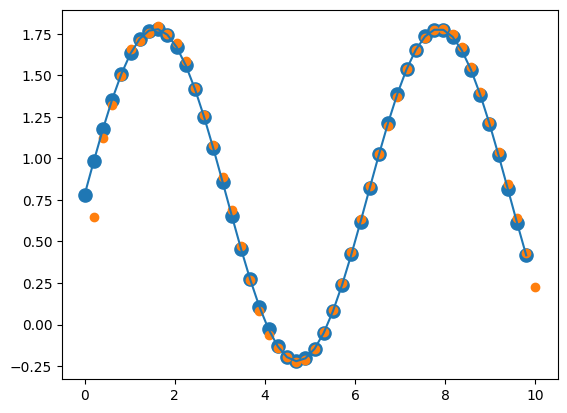

In [147]:
x = x.data.numpy().ravel()
y = y.data.numpy()
plt.scatter(time_steps[:-1], x.ravel(), s=90)
plt.plot(time_steps[:-1], x.ravel())

plt.scatter(time_steps[1:], predictions)
plt.show()